<div style ="background-color :LIGHTBLUE; color:#145A32;padding:15px;border-radius:10px;text-align:center;font-size:24px;"><b>CNN</b><br><span style ="color:#D35400;">CONVOLUTIONAL NEURAL NETWORK<br></span></div>

<div style="background-color:#E8F8F5;color:black;padding:8px;text-align:center;font-size:18px;border-radius:8px;">
<b>IMPORT LIBRARIES</b>
</div>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

TensorFlow/Keras → for building and training the CNN

Matplotlib → for visualization

NumPy → for handling numerical data


<div style="background-color:#E8F8F5;color:black;padding:8px;text-align:center;font-size:18px;border-radius:8px;">
<b>LOAD AND PREPROCESS DATASET</b>
</div>

In [2]:
test_dir=r"C:\Users\moham\OneDrive\Desktop\Deep learning\combined_images"

In [3]:
train=keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 44000 files belonging to 4 classes.


In [4]:
for images,labels in train.take(1):
    print(images.shape)
    print(labels.shape)

(32, 256, 256, 3)
(32,)


In [5]:
def process(image,label):
    image=image/255
    return image,label
train=train.map(process)

In [6]:
print(train)
print(images)
print(labels)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0.

<div style="background-color:#E8F8F5;color:black;padding:8px;text-align:center;font-size:18px;border-radius:8px;">
<b>CNN--MODEL</b>
</div>

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(1280,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Flatten()),
model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [8]:
evl=model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
x=np.array(images)
y=np.array(labels)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
print(x_train.shape)
y_train.shape
x_train.shape
y_test.shape

(25, 256, 256, 3)


(7,)

In [12]:
history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 5.6537 - accuracy: 0.4400 - val_loss: 300.0239 - val_accuracy: 0.2857
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 288.7535 - accuracy: 0.2400 - val_loss: 397.4404 - val_accuracy: 0.1429
Epoch 3/50
1/1 [==============================] - 4s 4s/step - loss: 358.1716 - accuracy: 0.2000 - val_loss: 337.2504 - val_accuracy: 0.1429
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 307.0628 - accuracy: 0.1200 - val_loss: 188.0595 - val_accuracy: 0.1429
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 165.8302 - accuracy: 0.1200 - val_loss: 84.3360 - val_accuracy: 0.1429
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 70.1129 - accuracy: 0.2000 - val_loss: 26.9893 - val_accuracy: 0.1429
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 19.3849 - accuracy: 0.2000 - val_loss: 22.9903 - val_accuracy: 0.4286
Epoch 8/50
1/1 [====

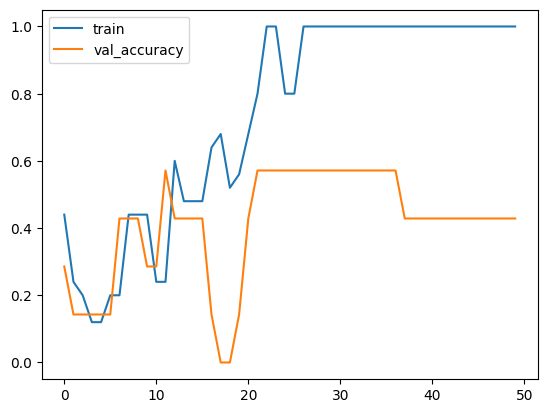

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


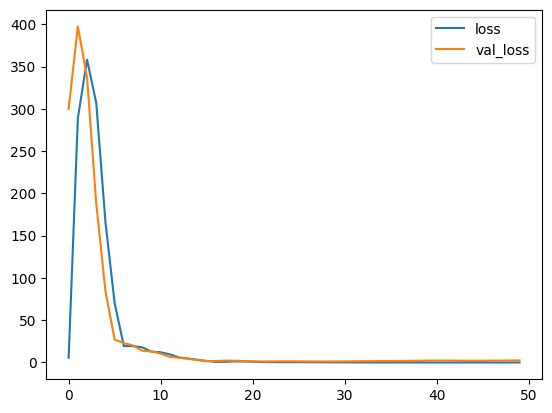

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_height = 256
img_width = 256
class_names = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_path = r"verymild.ppm"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 [==============================] - 0s 329ms/step
Predicted emotion: VeryMildDemented
Confidence: 47.54%


<div style="background-color:#E8F8F5;color:black;padding:8px;text-align:center;font-size:18px;border-radius:8px;">
<b>DATA--AUGMENTATION</b>
</div>

In [16]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(256,256, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [17]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4,activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20,restore_best_weights=True)

In [20]:
history=model.fit(x_train,y_train,batch_size=32,epochs=40,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/40


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 3s 3s/step - loss: 25.5441 - accuracy: 0.4000 - val_loss: 904.9312 - val_accuracy: 0.2857
Epoch 2/40
1/1 [==============================] - 1s 782ms/step - loss: 858.2505 - accuracy: 0.2400 - val_loss: 628.0283 - val_accuracy: 0.1429
Epoch 3/40
1/1 [==============================] - 1s 825ms/step - loss: 550.2990 - accuracy: 0.2000 - val_loss: 230.4455 - val_accuracy: 0.1429
Epoch 4/40
1/1 [==============================] - 1s 787ms/step - loss: 194.9457 - accuracy: 0.1200 - val_loss: 90.6369 - val_accuracy: 0.4286
Epoch 5/40
1/1 [==============================] - 1s 836ms/step - loss: 80.4595 - accuracy: 0.4400 - val_loss: 80.1352 - val_accuracy: 0.4286
Epoch 6/40
1/1 [==============================] - 1s 836ms/step - loss: 72.4839 - accuracy: 0.4400 - val_loss: 51.6028 - val_accuracy: 0.4286
Epoch 7/40
1/1 [==============================] - 1s 832ms/step - loss: 48.4539 - accuracy: 0.4400 - val_loss: 26.3600 - val_accuracy: 0.4286
Epoch 8/40
1/1

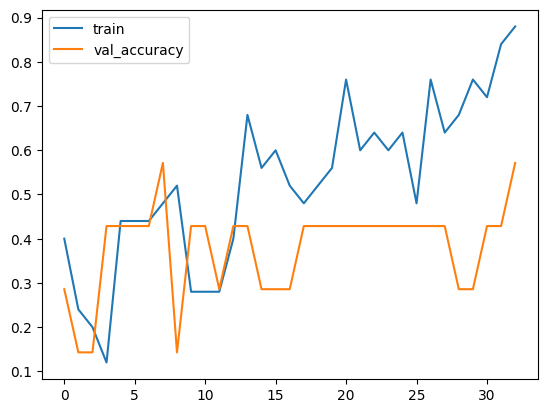

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


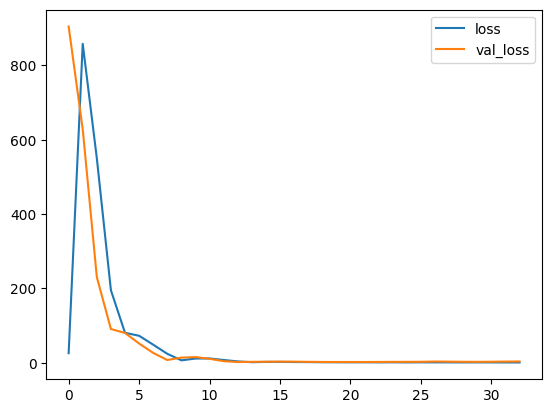

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [23]:
# ==============================
# ❤ Make Predictions
# ==============================
import tensorflow as tf
from tensorflow.keras.preprocessing import image

class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

img_path = r"moderate.ppm"  # Change image path
img = image.load_img(img_path, target_size=(256,256,3))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 * np.max(score)))

1/1 [==============================] - 0s 96ms/step
Predicted emotion: ModerateDemented
Confidence: 47.54%


<div style="background-color:#E8F8F5;color:black;padding:8px;text-align:center;font-size:18px;border-radius:8px;">
<b>DENSENET121</b>
</div>

In [24]:
base=tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(256,256,3),
    input_tensor=None,
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
)

In [25]:
model=Sequential([
    base,
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.15),
    Dense(256,activation='relu'),
    Dropout(0.15),
    Dense(128,activation='relu'),
    Dropout(0.15),
    Dense(4,activation='softmax'),
])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1/1 [==============================] - 58s 58s/step - loss: 1.3531 - accuracy: 0.4000 - val_loss: 1.3185 - val_accuracy: 0.4286
Epoch 2/10
1/1 [==============================] - 12s 12s/step - loss: 1.2006 - accuracy: 0.4000 - val_loss: 1.3148 - val_accuracy: 0.4286
Epoch 3/10
1/1 [==============================] - 12s 12s/step - loss: 0.8460 - accuracy: 0.8400 - val_loss: 1.2778 - val_accuracy: 0.4286
Epoch 4/10
1/1 [==============================] - 12s 12s/step - loss: 0.6416 - accuracy: 0.9200 - val_loss: 1.2444 - val_accuracy: 0.4286
Epoch 5/10
1/1 [==============================] - 12s 12s/step - loss: 0.4867 - accuracy: 0.9600 - val_loss: 1.2298 - val_accuracy: 0.4286
Epoch 6/10
1/1 [==============================] - 12s 12s/step - loss: 0.4481 - accuracy: 1.0000 - val_loss: 1.2230 - val_accuracy: 0.4286
Epoch 7/10
1/1 [==============================] - 12s 12s/step - loss: 0.3951 - accuracy: 0.9600 - val_loss: 1.2221 - val_accuracy: 0.4286
Epoch 8/10
1/1 [===========

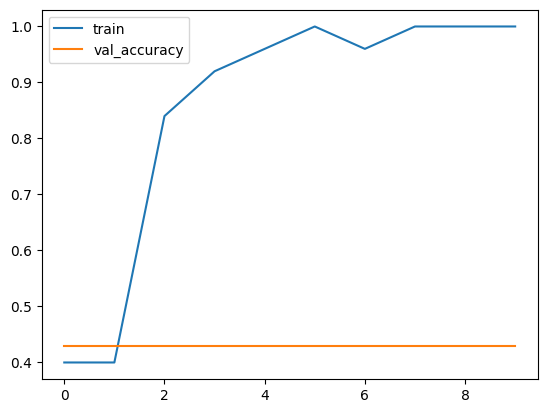

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


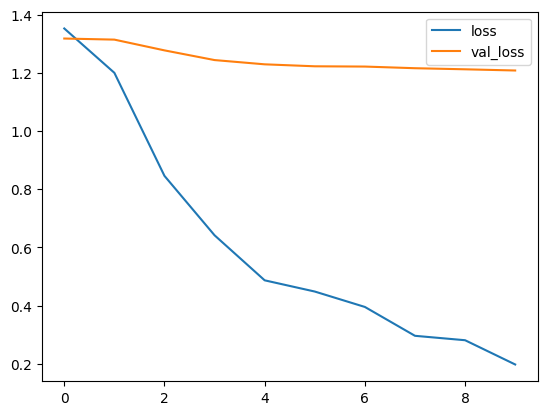

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_height = 256
img_width = 256
class_names = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_path = r"verymild.ppm"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 [==============================] - 3s 3s/step
Predicted emotion: NonDemented
Confidence: 30.46%


<div style="background-color:#E8F8F5;color:black;padding:8px;text-align:center;font-size:18px;border-radius:8px;">
<b>VGG16</b>
</div>

In [32]:
base1=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
)

In [33]:
model=Sequential([
    base1,
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.15),
    Dense(256,activation='relu'),
    Dropout(0.15),
    Dense(6,activation='softmax'),
])

In [34]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [36]:
history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/50
1/1 [==============================] - 23s 23s/step - loss: 3.7312 - accuracy: 0.2000 - val_loss: 1.9518 - val_accuracy: 0.4286
Epoch 2/50
1/1 [==============================] - 19s 19s/step - loss: 1.6710 - accuracy: 0.4000 - val_loss: 1.4697 - val_accuracy: 0.5714
Epoch 3/50
1/1 [==============================] - 18s 18s/step - loss: 1.6023 - accuracy: 0.3600 - val_loss: 1.4691 - val_accuracy: 0.4286
Epoch 4/50
1/1 [==============================] - 18s 18s/step - loss: 1.4987 - accuracy: 0.4000 - val_loss: 1.4354 - val_accuracy: 0.4286
Epoch 5/50
1/1 [==============================] - 17s 17s/step - loss: 1.4780 - accuracy: 0.4800 - val_loss: 1.3838 - val_accuracy: 0.4286
Epoch 6/50
1/1 [==============================] - 17s 17s/step - loss: 1.2660 - accuracy: 0.5200 - val_loss: 1.3758 - val_accuracy: 0.4286
Epoch 7/50
1/1 [==============================] - 17s 17s/step - loss: 1.3318 - accuracy: 0.3200 - val_loss: 1.5011 - val_accuracy: 0.4286
Epoch 8/50
1/1 [===========

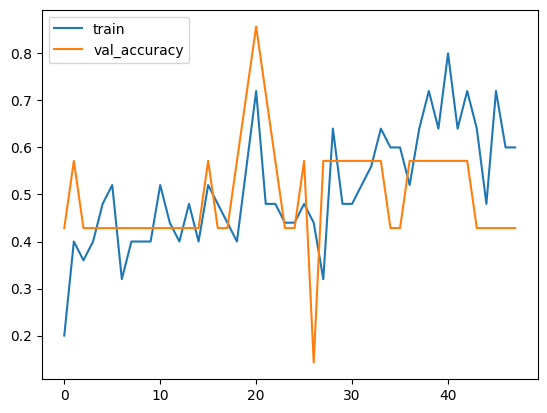

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


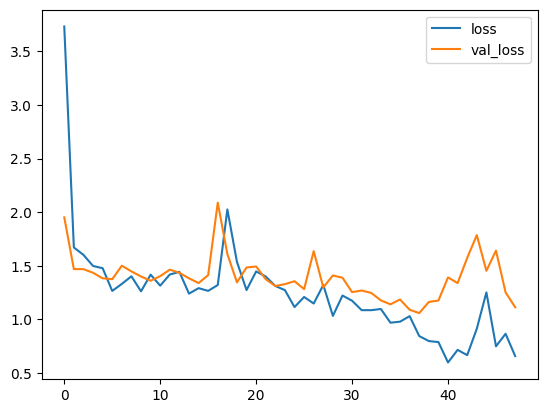

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_height = 256
img_width = 256
class_names = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_path = r"verymild.ppm"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 [==============================] - 0s 446ms/step
Predicted emotion: ModerateDemented
Confidence: 35.20%
